<a href="https://colab.research.google.com/github/JhonathanOrtiz/RecurrentNN/blob/master/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


>  ## Datos secuenciales

Los tipos de datos secuenciales datos en el que conseguimos que un dato depende de otro. Para ilustrar ello demos un ejemplo. Los video estas compuesto por una sucesion de fotogramas (Frames) estos son imagenes simples y en un video podemos mostrar hasta 60 fotogramas por segundo, ahora si quisieramos predecir el siguiente fotograma el siguiente fotograma de u video necesitaremos información de los fotogramas anteriores y con una red neuronal Feedforward no podremos resolver ésta tarea ya que no tenemos forma de conocer estados anteriores.

El texto es otro tipo de dato secuencial dado que en una oración la posición en la que se encuentren las palabras es fundamental para comprender lo que estamos tratando de decir, así por esa razón no te sorprenda saber que estàs redes han sido la pidra angular en NLP.


![Image](https://www.researchgate.net/profile/Corey_Duberstein/publication/281719202/figure/fig2/AS:671515515314190@1537113183660/A-video-is-a-sequence-of-images-called-frames-Each-frame-is-a-two-dimensional-grid-of.ppm)


[Sitio web de la image  de la image](https://www.researchgate.net/figure/A-video-is-a-sequence-of-images-called-frames-Each-frame-is-a-two-dimensional-grid-of_fig2_281719202)



> ### Redes neuronales Recurrentes (RNN)

Para solucionar este problema nacieron éste tipo de redes neuronales que son capaces de tener una especie de memoria y hacer predicciones tomando no solo en input del estado actual sino tambien tomar en cuenta el estado anterior. 


![image](https://miro.medium.com/max/250/1*T_ECcHZWpjn0Ki4_4BEzow.gif)


[Link original de la imagen](https://towardsdatascience.com/illustrated-guide-to-recurrent-neural-networks-79e5eb8049c9)


Esa es la arquitectura fundamental de una red recurrente pero recordamos, nosotros estamos analizando datos secuenciales, es decir en un instante de tiempo *t* tendremos una entrada distinta al instante *t+1* para ilustrarlo vamos a descomponer nuestra arquitectura fundamental.
 

 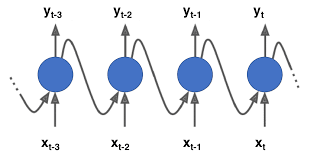

 De esa manera podemos ver como se comporta la red en distintos instantes de tiempo. donde para calcular la salida de nuestra red neuronal seria igual a la suma ponderada de la entrada y el factor de bias pasado por una funcion de activación. `Y = F(Wa + b)` donde los parametros `W` y `b` son nuestros para parametros entrenables y `a` la activación que ya veremos como calcular y `F` nuestra función de activación, además de la salida calculamos el *Hidden state* el cual concatenaremos a la entrada y pasaremos junto a nuestro dato como input de la red y este estado viene dado por `a = G(Wa-1 + Wx + b)` Como puedes notar la salida de la red depende de la activación calculada (*Hiden state*) y esa activación calculada depende de la activacion calculada en el paso anterior.

 Ahora puedes volver a echarle un vistazo al gráfico para comprender qué lo que nosotros llamamos `a` o *Hidden State* es el valor que recorre a la red de forma cíclica y ´Y´ la salida de la red.

 ### NOTA

 Tenemos 3 parametros `W` y 2 `b` recuerda que a pesar de mostrar una representacion de distintos instates de tiempo la red es un solo bloque por lo tanto son solo esos 5 parametros los que necesitamos entrenar.
 






> # Implmentación

Ahora implementemos una simple RNN para analizar series de tiempo.



In [0]:
#Importar librerias
import numpy as np
import torch
from torch import nn
import matplotlib.pyplot as plt
%matplotlib inline

En nuestro primer caso generarmos un conjunto de datos artificiales que tengan naturaleza secuencial, como ya vimos éstos son los datos que analizan éste tipo de redes

(21,)
(21, 1)


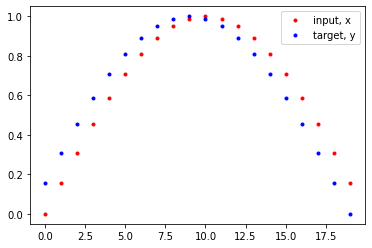

In [72]:
#La proxima variable va a almacenar la cantidad de datos en un batch
tam_sec = 20

#Crea un conjunto de datos desde 0 hasta pi con 21 datos
time_steps = np.linspace(0, np.pi, tam_sec + 1)
data = np.sin(time_steps)
print(data.shape)
data.resize((tam_sec + 1, 1))
print(data.shape)
x = data[:-1] # Nuestro conjnto de datos sin el ultim0
y = data[1:] #Nuestro conjnto de datos sin el primero

#Vizualizacion de datos
plt.plot(x, 'r.', label='input, x') # x
plt.plot(y, 'b.', label='target, y') # y

plt.legend(loc='best')
plt.show()

## DEFINE EL MODELO

En nuestro modelo agregaremos una celda recurrente que será la que hará el análisis de nuestros datos y una capa feedforward que nos dará la salida, para ello necesitaremos los siguientes parametros:

* Input size: Tamaño de la entrada
* Hidden_dim: Numero de caracteristicas en la salida y  hidden_state
* n_layers: Cantidad de modulos RNN si es mayor que usualmente entre 1-3 si es mayor que 1 significaque tenemos una pila de RNN
* batch first: Significa si queremos en la salida la dimension del batch (batch, tamaño de la secuencia, hidden_dim)

### NOTA

El tamaño de la secuencia es distinto que el tamaño de entrada.

Cada cuadro en el eje Y es un modulo de RNN y cada cuadro en el eje X es un time step.
![texto alternativo](https://blog.exxactcorp.com/wp-content/uploads/2019/03/Deep-RNN.png)

In [0]:
class RNN(nn.Module):
  def __init__(self, input_size, output_size, hidden_dim, n_layers):
    super(RNN, self).__init__()
    self.hidden_dim = hidden_dim
    
    #Define la arquitectura de la RNN
    self.RNN = nn.RNN(input_size, hidden_dim, n_layers)
    self.fc = nn.Linear(hidden_dim, output_size)

  def forward(self, x, hidden_state):
    #El calculo de la salida de una red recurrente la calculamos a partir de la entrada y el estado oculto en el paso anterior, si es el primer paso hidden_state es un vector de ceros.
    batch_size = x.size(0)
    #Cacula la salida de la celda recurrente
    y, hidden_state = self.RNN(x, hidden_state) # Y = (Wy*Hidden_state + bias)
    y = y.view(-1, self.hidden_dim)
    #output de la capa fully connected
    output = self.fc(y)

    return output, hidden_state

In [74]:
#inicializa la red neuronal
test = RNN(1, 1, 10, 2)

#Crea un set de datos
data = np.linspace(0,np.pi, 20)
data = np.sin(data)
print('Shape de los datos generados: ', data.shape)
print('')
#De matriz a vector
data.resize(tam_sec, 1)
x = torch.tensor(data, dtype=torch.float32)
#Agrega la dimension de batch 
x = x.unsqueeze(0)
print('Shape de los datos luego de preprocesar: ', x.shape)
print('')

#Haz una prediccion
test, hidden_state = test(x, None)
print('Forma de la salida: ', test.size())
print('')
print('Forma del hidden state: ', hidden_state.size())


Shape de los datos generados:  (20,)

Shape de los datos luego de preprocesar:  torch.Size([1, 20, 1])

Forma de la salida:  torch.Size([20, 1])

Forma del hidden state:  torch.Size([2, 20, 10])


Tal vez antes no mencionamos el uso de una capa de una red neuronal tradicional, pero recuerda que al igual que en la redes neuronales convolucionales el objetivo de esta capa es realizar la clasificación de un conjunto de caracteríscas que nos devuelen las celdas recurrentes.

Ahora incializamos nuestro model y decdimos los hiperparametros,como nuestro problema es sencillo la elección de los hiperparametros puede ser más sencilla pero para crear modelos mas complejos, te recomiendo alguna lectura acerca de ellos.

In [114]:
input_size=1
output_size=1
hidden_dim = 32
n_layers=1

rnn = RNN(input_size=input_size, output_size=output_size, hidden_dim=hidden_dim, n_layers=n_layers)

print('MODELO: ', rnn)

MODELO:  RNN(
  (RNN): RNN(1, 32)
  (fc): Linear(in_features=32, out_features=1, bias=True)
)




> # Función de Coste / Loss Function

Puesto que trabajamos con un conjunto de datos continuos, es decir, queremos predecir el proximo punto de una onda senoidal, es un problema de regresión por tal motivo haremos una prediccion y luego comparamos el desempeño de la red con el valor real, para ello usaremos ``MSE``Error cuadratico medio. 

Luego de calcular nuestra perdida debemos calcular gradiente y optimizar nuestra red, para calcular gradientes Pytorch no ofrece la facilidad con ``Automatix Diferentiation`` y utilizaremos Adam para optimizar nuestra red (Es el mas utilizado para modelos recurrentes.)



In [115]:
Loss = nn.MSELoss()
optimizer = torch.optim.Adam(rnn.parameters(), lr=1e-4)

print('Funcion de coste: ', Loss)
print('')
print('Optimizador: ', optimizer)

Funcion de coste:  MSELoss()

Optimizador:  Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.0001
    weight_decay: 0
)




># Bucle de entrenamiento

Ahora podemos crear un bucle para que nuestra red nuronal aprenda.

**IMPORTATE**

Recuerda que en una epoca nuestra red analiza una cantidad x (batch size) de datos, antes de empezar una nueva época inicializamos nuestro ``hidde state`` y dentro de nuestro batch size el ``hidden state`` lo devuelve el metodo ``forward`` que definimos arriba. 

In [0]:
def train(model, n_steps, print_every):

  hidden = None
  for batch_i, step in enumerate(range(n_steps)):

    time_step = np.linspace(step*np.pi, (step+1)*np.pi, tam_sec+1, tam_sec+1)
    data = np.sin(time_step)
    data.resize((20+1, 1))
    

    x = data[:-1]
    y = data[1:]
  
    #Convertir los datos a tensores
    x_train = torch.tensor(x, dtype=torch.float32).unsqueeze(0) #Torch es delicado con los tipos de datos, verificar siempre que son float32
    #Agrega la dimension del batch

    y_train = torch.tensor(y, dtype=torch.float32)

    #Prediccion
    prediccion, hidden = model(x_train, hidden)

    #creamos una nueva variable y hacemos un detch del hidden state del grafo para evitar problemas en el backpropagation
    hidden = hidden.data

    #Evualuamos al modelo
    loss = Loss(prediccion, y_train)

    #Ponemos gradientes en 0
    optimizer.zero_grad()
    #Calculamos gradienes
    loss.backward()
    #Optimizamos nuestra red
    optimizer.step()

    if batch_i % print_every == 0:
      print('PASO: {} ERROR: {}'.format(step+1, loss.item()))
      plt.plot(time_step[1:], x, 'r')
      plt.plot(time_step[1:], prediccion.data.numpy().flatten(), 'b')
      plt.show()
  
  return nn




PASO: 1 ERROR: 0.31001245975494385


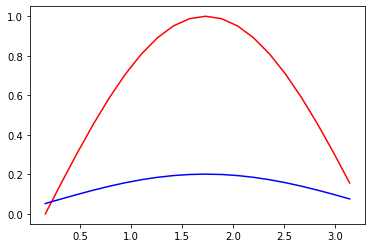

PASO: 16 ERROR: 0.01676703616976738


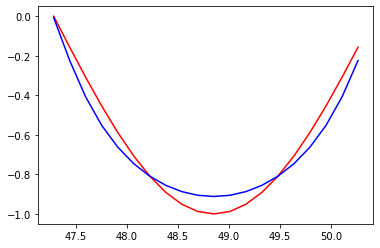

PASO: 31 ERROR: 0.017011258751153946


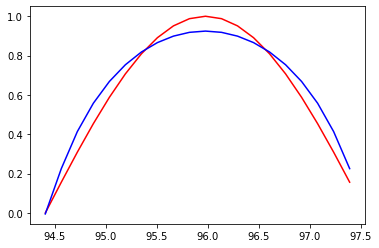

PASO: 46 ERROR: 0.017169177532196045


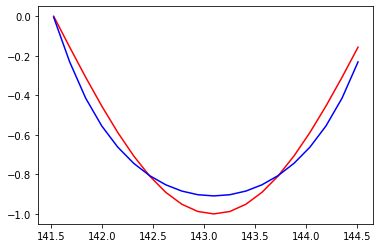

PASO: 61 ERROR: 0.016503583639860153


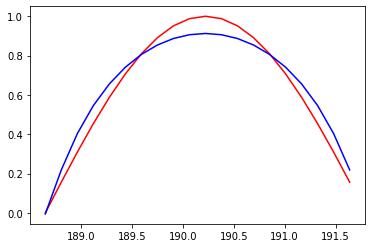

PASO: 76 ERROR: 0.01684744283556938


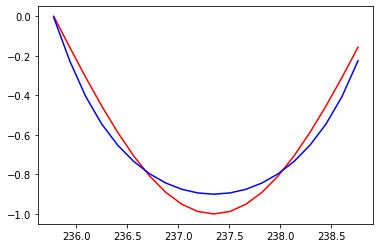

PASO: 91 ERROR: 0.016307618468999863


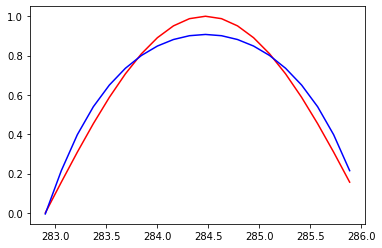

PASO: 106 ERROR: 0.016747793182730675


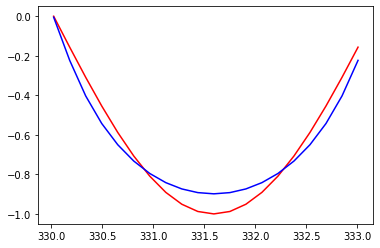

PASO: 121 ERROR: 0.016240861266851425


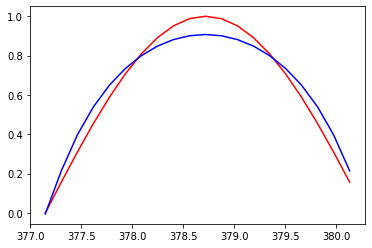

PASO: 136 ERROR: 0.016694631427526474


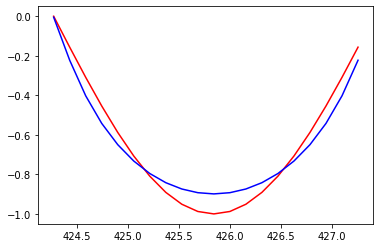

PASO: 151 ERROR: 0.01619408093392849


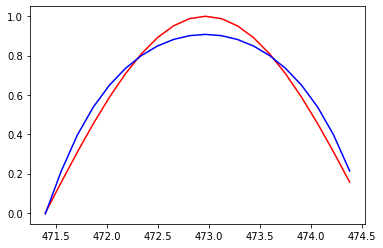

PASO: 166 ERROR: 0.016645776107907295


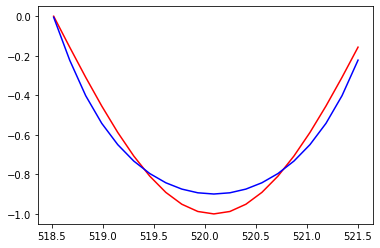

PASO: 181 ERROR: 0.016146691516041756


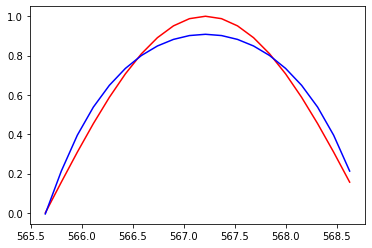

PASO: 196 ERROR: 0.01659535989165306


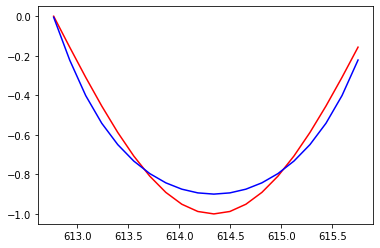

PASO: 211 ERROR: 0.016097865998744965


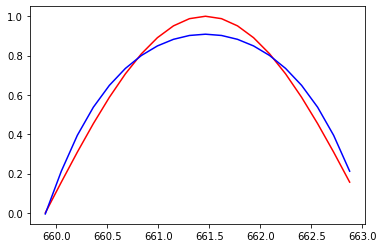

PASO: 226 ERROR: 0.016544077545404434


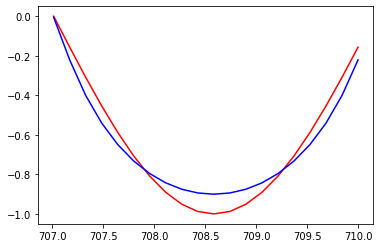

PASO: 241 ERROR: 0.01604859158396721


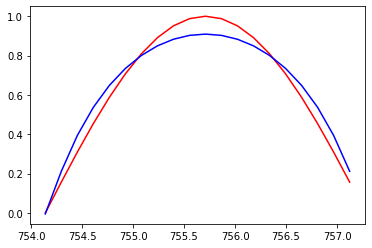

PASO: 256 ERROR: 0.01649247482419014


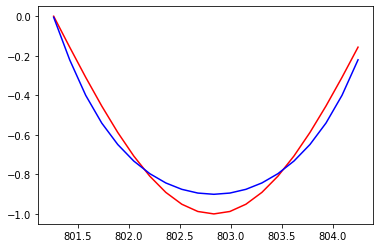

PASO: 271 ERROR: 0.015999168157577515


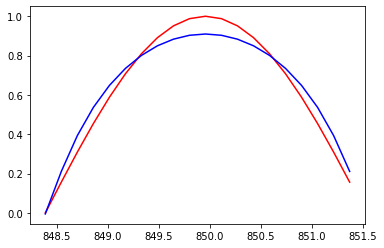

PASO: 286 ERROR: 0.016440650448203087


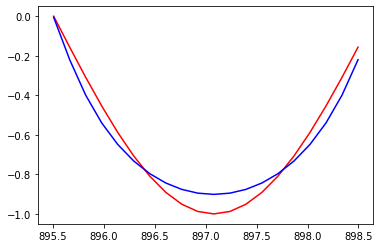

In [120]:
n_steps = 600
print_every = 15

modelo = train(rnn, n_steps, print_every)

##La grafica roja es nuetro objetivo y la azul es nuestra prediccion



> # Conclusión

Los modelos recurrentes al principio pueden parecer mágicos por éstos resultados por ahora pensemos que es asi, luego profundizaremos en ello. Estas redes tienen un pequeño problema, pero antes de hablar de ello miremos una imagen.

![texto alternativo](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcS-hJOutJNdX1Fdv1775_3F3r8lcvYyMcWRSrYOg-dpa_RLOu7-&usqp=CAU)

[FUENTE DE LA IMAGEN](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcS-hJOutJNdX1Fdv1775_3F3r8lcvYyMcWRSrYOg-dpa_RLOu7-&usqp=CAU)

Como puedes ver en cada paso la red neuronal calcula un nuevo hidden state por tanto podriamos decir que de algún modo la información que se analiza primero se va olvidando, apoyandonos en el gráfico la palabra ´´WHAT´´ es azul en la proxima neurona el azul es solo la mitad y a medida que pasa el tiempo el azul opcupa menos espacio a eso le llamamos olvidar, en algunos casos necesitamos esa información fresca, Si analizamos un párrafo al principio de el puede  existir información importante para dar contexto. Para solucionar ello nacieron las redes LSTM, pero ellas tambien hablaremos luego.





> # REFRENCIAS

https://towardsdatascience.com/understanding-rnn-and-lstm-f7cdf6dfc14e


https://github.com/udacity/deep-learning-v2-pytorch

http://karpathy.github.io/2015/05/21/rnn-effectiveness/

https://stanford.edu/~shervine/teaching/cs-230/cheatsheet-recurrent-neural-networks





In [123]:
!git remote add origin https://github.com/JhonathanOrtiz/RecurrentNN.git
!git push -u origin master

error: src refspec master does not match any.
error: failed to push some refs to 'https://github.com/JhonathanOrtiz/RecurrentNN.git'


In [122]:
!git init

Initialized empty Git repository in /content/.git/
